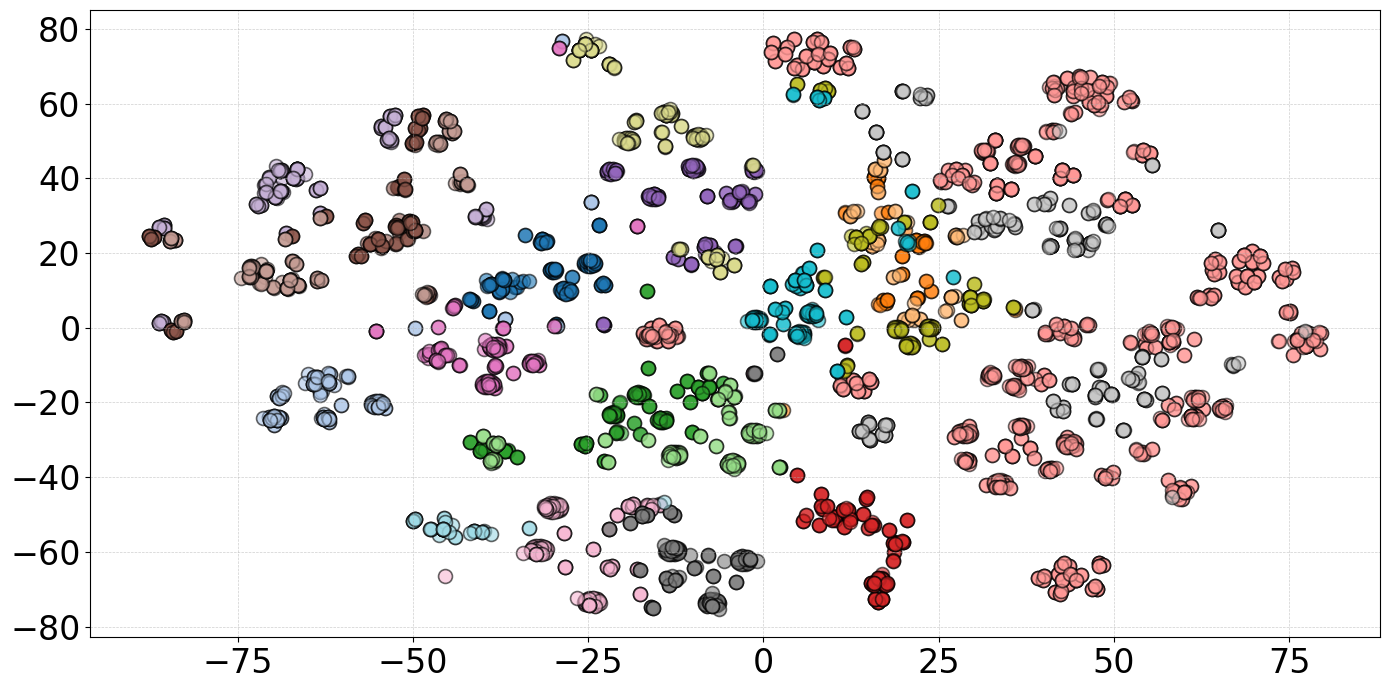

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

train_all_path = '../../data_preprocess/dataset/1/train_all.csv'
test_path = '../../translation/0.result/1/test_p.csv'

train_df = pd.read_csv(train_all_path)
test_df = pd.read_csv(test_path)

data = pd.concat([train_df, test_df], ignore_index=True)
data = data[data['MDM'] == True]

vectorizer = TfidfVectorizer(token_pattern=r'\S+')
tfidf_matrix = vectorizer.fit_transform(data['tag_description'])

grouped_data = data.groupby(['thing', 'property']).agg(
    tp_count=('thing', 'size'), pattern=('pattern', 'first')).reset_index()

result = grouped_data.loc[grouped_data.groupby('pattern')['tp_count'].idxmax()].reset_index(drop=True)

top_n = 20
top_n_patterns = result.nlargest(top_n, 'tp_count')

filtered_data = data[data['pattern'].isin(top_n_patterns['pattern'])]
filtered_data.to_csv('filtered_data_plot.csv', index=False)
filtered_tfidf_matrix = vectorizer.transform(filtered_data['tag_description'])

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(filtered_tfidf_matrix.toarray())

unique_patterns = filtered_data['pattern'].unique()
color_map = plt.get_cmap('tab20', len(unique_patterns))
pattern_to_color = {pattern: idx for idx, pattern in enumerate(unique_patterns)}

plt.figure(figsize=(14, 7))

for pattern, color_idx in pattern_to_color.items():
    pattern_indices = filtered_data['pattern'] == pattern
    plt.scatter(tsne_results[pattern_indices, 0], tsne_results[pattern_indices, 1], 
                color=color_map(color_idx), marker='o', s=100, alpha=0.6, edgecolor='k', linewidth=1.2)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


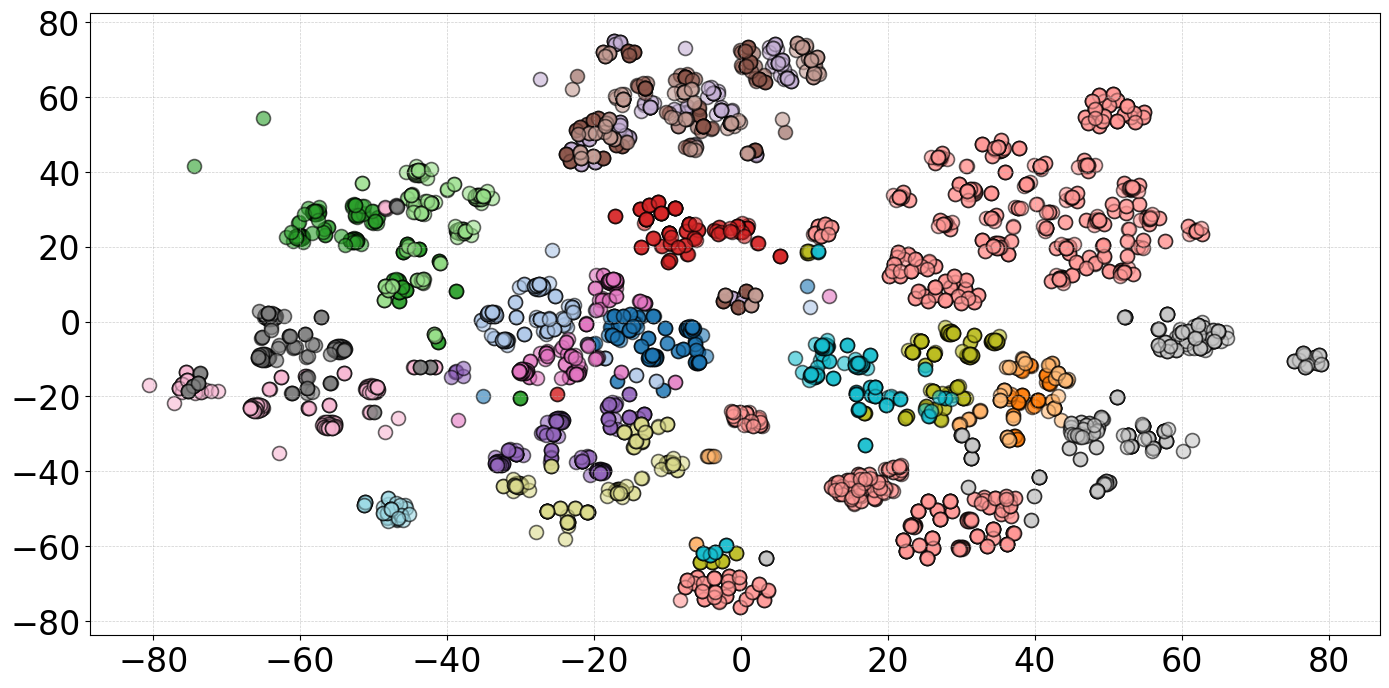

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 'filtered_data_plot.csv' 파일을 읽기
filtered_data = pd.read_csv('filtered_data_plot.csv')

# BoW로 벡터화 (token_pattern=r'\S+'로 설정하여 모든 non-whitespace를 토큰으로 사용)
vectorizer = CountVectorizer(token_pattern=r'\S+')
bow_matrix = vectorizer.fit_transform(filtered_data['tag_description'])

# t-SNE 차원 축소
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# 시각화를 위한 준비
unique_patterns = filtered_data['pattern'].unique()
color_map = plt.get_cmap('tab20', len(unique_patterns))
pattern_to_color = {pattern: idx for idx, pattern in enumerate(unique_patterns)}

plt.figure(figsize=(14, 7))

# 각 패턴별로 시각화
for pattern, color_idx in pattern_to_color.items():
    pattern_indices = filtered_data['pattern'] == pattern
    plt.scatter(tsne_results[pattern_indices, 0], tsne_results[pattern_indices, 1], 
                color=color_map(color_idx), marker='o', s=100, alpha=0.6, edgecolor='k', linewidth=1.2)

# 그래프 설정
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


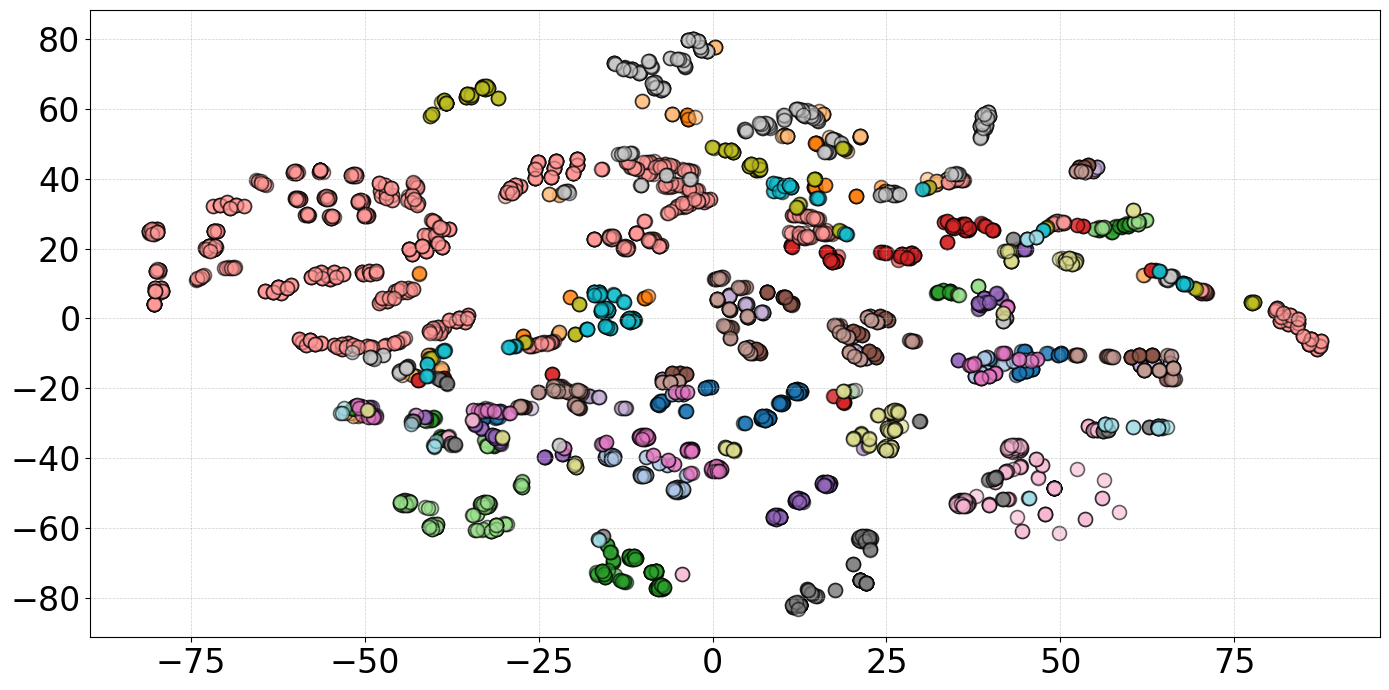

In [5]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def compute_sentence_vector(sentence, model, vector_size):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

filtered_data = pd.read_csv('filtered_data_plot.csv')

sentences = [desc.split() for desc in filtered_data['tag_description'].tolist()]

vector_size = 200
window_size = 3
model = Word2Vec(sentences, vector_size=vector_size, window=window_size, min_count=1, workers=4)

sentence_vectors = np.array([compute_sentence_vector(desc, model, vector_size) for desc in filtered_data['tag_description']])

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(sentence_vectors)

unique_patterns = filtered_data['pattern'].unique()
color_map = plt.get_cmap('tab20', len(unique_patterns))
pattern_to_color = {pattern: idx for idx, pattern in enumerate(unique_patterns)}

plt.figure(figsize=(14, 7))

for pattern, color_idx in pattern_to_color.items():
    pattern_indices = filtered_data['pattern'] == pattern
    plt.scatter(tsne_results[pattern_indices, 0], tsne_results[pattern_indices, 1], 
                color=color_map(color_idx), marker='o', s=100, alpha=0.6, edgecolor='k', linewidth=1.2)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()
